Jumping Off from the normalized gaze data and gaze overlayed videos

In [13]:

import pandas as pd

# Load the dataset
file_path = "/Users/bryantreese/Desktop/Deep_Learning/Human-Alignment-Hazardous-Driving-Detection/data/normalized_gaze_data.csv"
gaze_data = pd.read_csv(file_path)

# Display basic information about the dataset
gaze_data.info(), gaze_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40653 entries, 0 to 40652
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 40653 non-null  int64  
 1   userId                                     40653 non-null  object 
 2   videoId                                    40653 non-null  object 
 3   hazardDetected                             40653 non-null  bool   
 4   detectionConfidence                        40653 non-null  int64  
 5   hazardSeverity                             40653 non-null  int64  
 6   width                                      40653 non-null  int64  
 7   height                                     40653 non-null  int64  
 8   duration                                   40653 non-null  float64
 9   licenseAge                                 40653 non-null  float64
 10  age                   

(None,
    Unnamed: 0                   userId   videoId  hazardDetected  \
 0           0  jonahmulcrone@gmail.com  video219           False   
 1           1  jonahmulcrone@gmail.com  video219           False   
 2           2  jonahmulcrone@gmail.com  video219           False   
 3           3  jonahmulcrone@gmail.com  video219           False   
 4           4  jonahmulcrone@gmail.com  video219           False   
 
    detectionConfidence  hazardSeverity  width  height  duration  licenseAge  \
 0                    5               0   1280     960    15.755        17.0   
 1                    5               0   1280     960    15.755        17.0   
 2                    5               0   1280     960    15.755        17.0   
 3                    5               0   1280     960    15.755        17.0   
 4                    5               0   1280     960    15.755        17.0   
 
    ...  original_x  original_y  original_width  original_height  \
 0  ...  500.496763  499.95

In [14]:
pip install matplotlib seaborn numpy


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/3c/8_0h77qx1897wgc5676zl8yh0000gn/T/ipykernel_22383/477497619.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hazardDetected", data=gaze_data, palette="coolwarm")


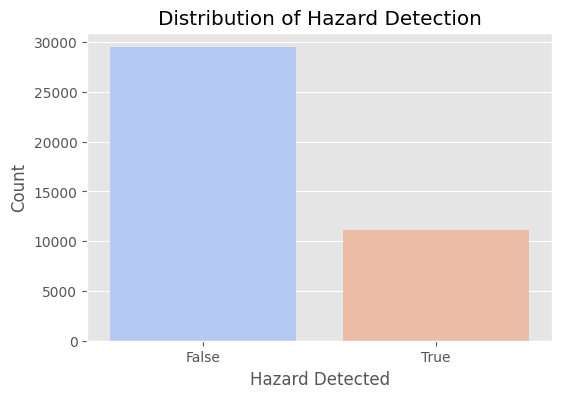

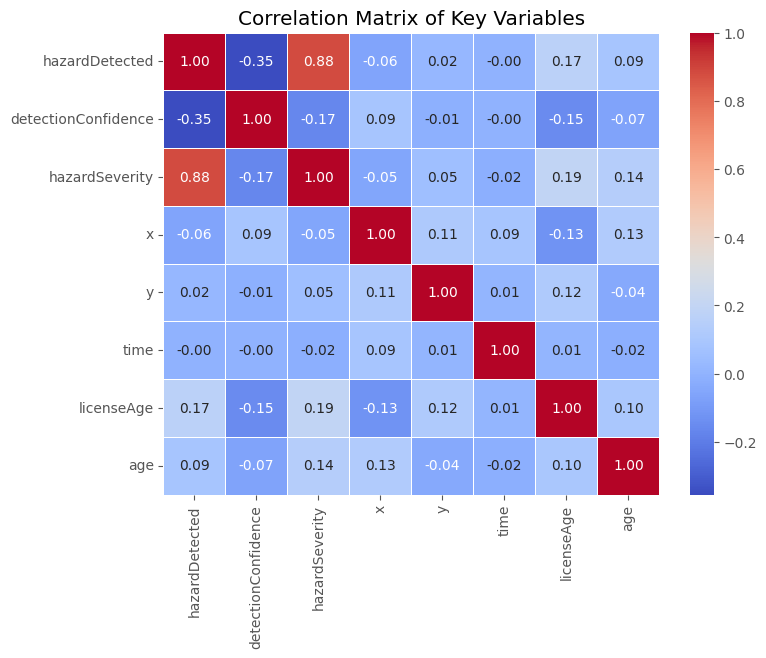

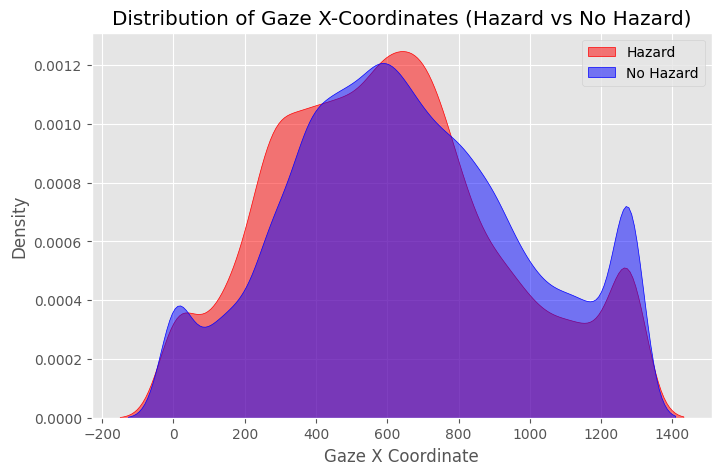

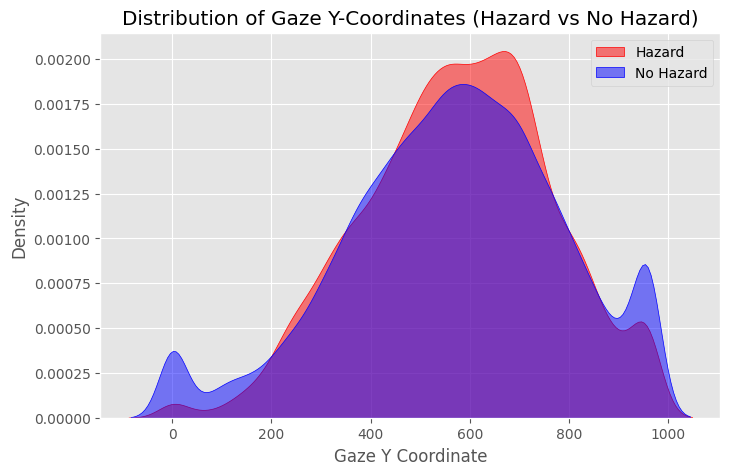

/var/folders/3c/8_0h77qx1897wgc5676zl8yh0000gn/T/ipykernel_22383/477497619.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="hazardDetected", y="licenseAge", data=gaze_data, palette="coolwarm")


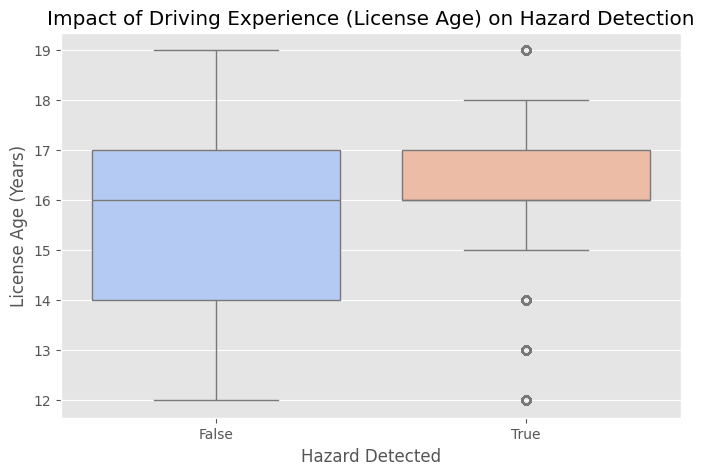

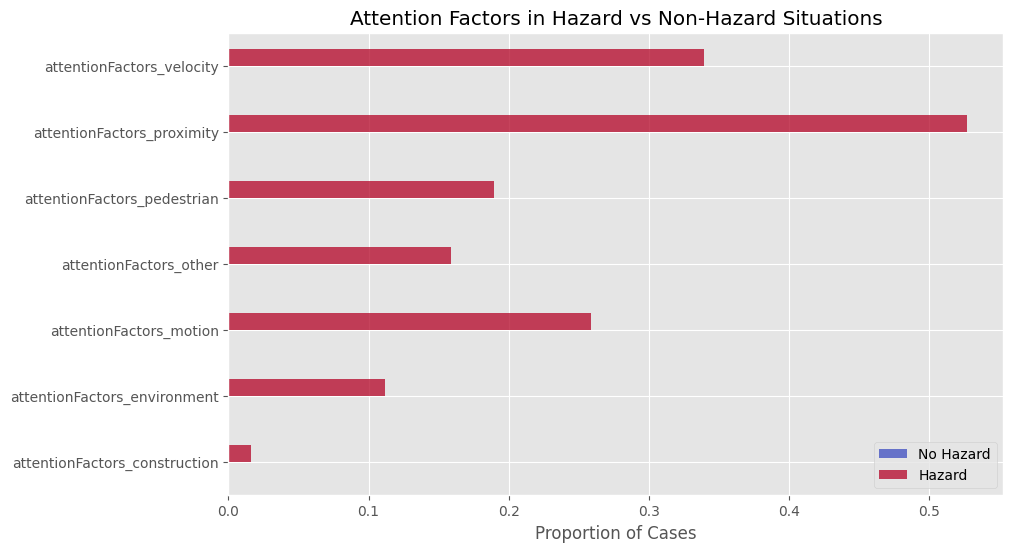

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
plt.style.use("ggplot")

# 1. Distribution of Hazard Detection
plt.figure(figsize=(6, 4))
sns.countplot(x="hazardDetected", data=gaze_data, palette="coolwarm")
plt.title("Distribution of Hazard Detection")
plt.xlabel("Hazard Detected")
plt.ylabel("Count")
plt.show()

# 2. Correlation Matrix (Focusing on Key Numeric Variables)
correlation_matrix = gaze_data[["hazardDetected", "detectionConfidence", "hazardSeverity", "x", "y", "time", "licenseAge", "age"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables")
plt.show()

# 3. Gaze Distribution for Hazard vs Non-Hazard Cases
plt.figure(figsize=(8, 5))
sns.kdeplot(gaze_data[gaze_data["hazardDetected"] == True]["x"], label="Hazard", fill=True, color="red", alpha=0.5)
sns.kdeplot(gaze_data[gaze_data["hazardDetected"] == False]["x"], label="No Hazard", fill=True, color="blue", alpha=0.5)
plt.title("Distribution of Gaze X-Coordinates (Hazard vs No Hazard)")
plt.xlabel("Gaze X Coordinate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(gaze_data[gaze_data["hazardDetected"] == True]["y"], label="Hazard", fill=True, color="red", alpha=0.5)
sns.kdeplot(gaze_data[gaze_data["hazardDetected"] == False]["y"], label="No Hazard", fill=True, color="blue", alpha=0.5)
plt.title("Distribution of Gaze Y-Coordinates (Hazard vs No Hazard)")
plt.xlabel("Gaze Y Coordinate")
plt.ylabel("Density")
plt.legend()
plt.show()

# 4. Impact of Experience (License Age) on Hazard Detection
plt.figure(figsize=(8, 5))
sns.boxplot(x="hazardDetected", y="licenseAge", data=gaze_data, palette="coolwarm")
plt.title("Impact of Driving Experience (License Age) on Hazard Detection")
plt.xlabel("Hazard Detected")
plt.ylabel("License Age (Years)")
plt.show()

# 5. Attention Factors for Hazard vs Non-Hazard Situations
attention_factors = [
    "attentionFactors_construction", "attentionFactors_environment", "attentionFactors_motion",
    "attentionFactors_other", "attentionFactors_pedestrian", "attentionFactors_proximity",
    "attentionFactors_velocity"
]

hazard_attention = gaze_data.groupby("hazardDetected")[attention_factors].mean().T

hazard_attention.plot(kind="barh", figsize=(10, 6), colormap="coolwarm", alpha=0.75)
plt.title("Attention Factors in Hazard Situations")
plt.xlabel("Proportion of Cases")
plt.legend(["Hazard"], loc="lower right")
plt.show()


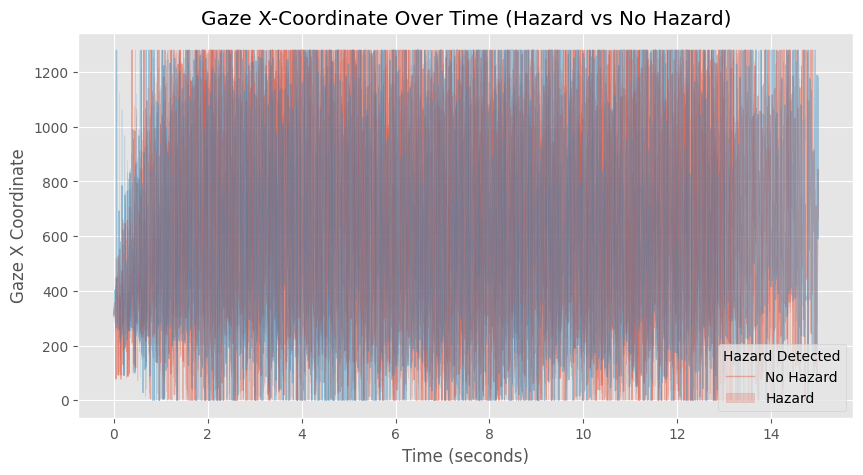

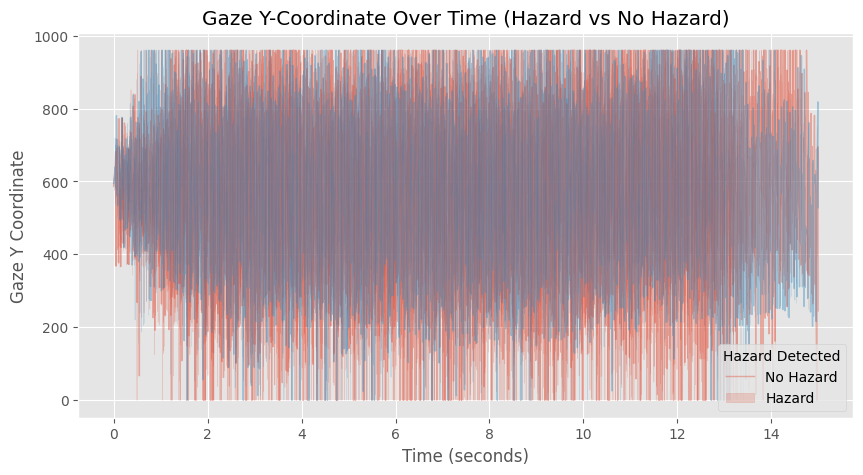

/var/folders/3c/8_0h77qx1897wgc5676zl8yh0000gn/T/ipykernel_22383/4066133051.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gaze_data_cleaned, x="hazardDetected", y="gaze_variance", palette="coolwarm")


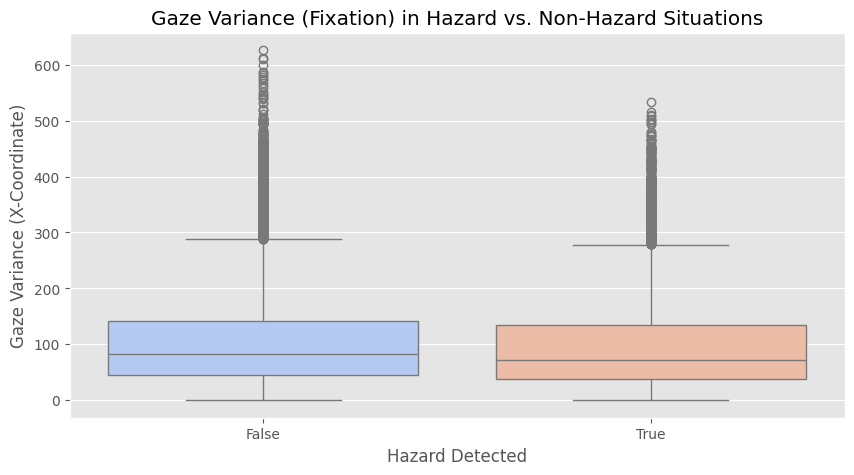

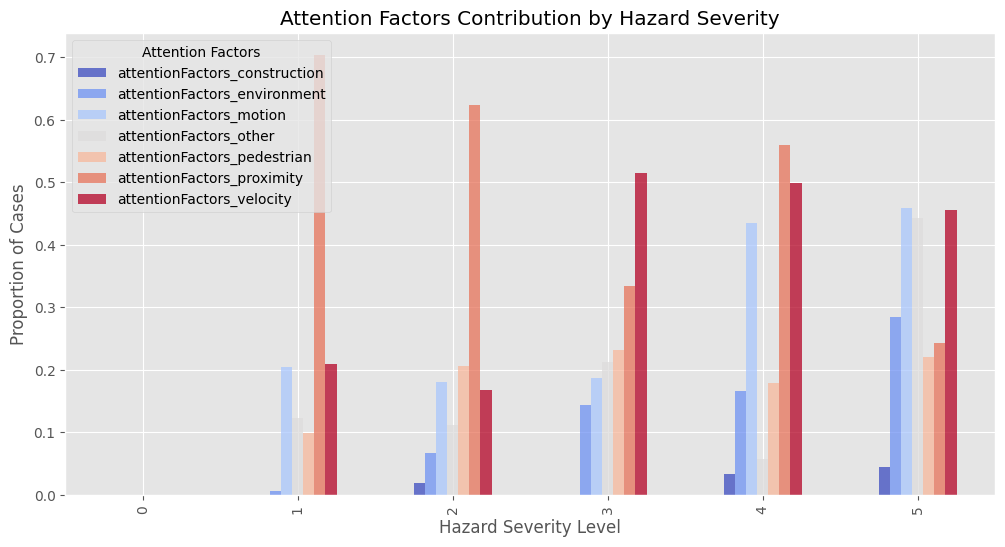

In [16]:

# Ensure proper data types
gaze_data["hazardDetected"] = gaze_data["hazardDetected"].astype(bool)
gaze_data["time"] = pd.to_numeric(gaze_data["time"], errors="coerce")
gaze_data["x"] = pd.to_numeric(gaze_data["x"], errors="coerce")
gaze_data["y"] = pd.to_numeric(gaze_data["y"], errors="coerce")

# Remove any remaining NaN values in x, y, and time
gaze_data_cleaned = gaze_data.dropna(subset=["x", "y", "time"])

# 1. **Gaze Fixation Over Time (Hazard vs. No Hazard)**
plt.figure(figsize=(10, 5))
sns.lineplot(data=gaze_data_cleaned, x="time", y="x", hue="hazardDetected", alpha=0.4, linewidth=1)
plt.title("Gaze X-Coordinate Over Time (Hazard vs No Hazard)")
plt.xlabel("Time (seconds)")
plt.ylabel("Gaze X Coordinate")
plt.legend(title="Hazard Detected", labels=["No Hazard", "Hazard"])
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=gaze_data_cleaned, x="time", y="y", hue="hazardDetected", alpha=0.4, linewidth=1)
plt.title("Gaze Y-Coordinate Over Time (Hazard vs No Hazard)")
plt.xlabel("Time (seconds)")
plt.ylabel("Gaze Y Coordinate")
plt.legend(title="Hazard Detected", labels=["No Hazard", "Hazard"])
plt.show()

# 2. **Gaze Fixation Variance (Higher variance may indicate distracted driving)**
gaze_data_cleaned["gaze_variance"] = gaze_data_cleaned.groupby("userId")["x"].transform(lambda x: x.rolling(window=10).std())

plt.figure(figsize=(10, 5))
sns.boxplot(data=gaze_data_cleaned, x="hazardDetected", y="gaze_variance", palette="coolwarm")
plt.title("Gaze Variance (Fixation) in Hazard vs. Non-Hazard Situations")
plt.xlabel("Hazard Detected")
plt.ylabel("Gaze Variance (X-Coordinate)")
plt.show()

# 3. **Attention Factors and Hazard Severity**
attention_factors = [
    "attentionFactors_construction", "attentionFactors_environment", "attentionFactors_motion",
    "attentionFactors_other", "attentionFactors_pedestrian", "attentionFactors_proximity",
    "attentionFactors_velocity"
]

hazard_attention = gaze_data_cleaned.groupby("hazardSeverity")[attention_factors].mean()

hazard_attention.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", alpha=0.75)
plt.title("Attention Factors Contribution by Hazard Severity")
plt.xlabel("Hazard Severity Level")
plt.ylabel("Proportion of Cases")
plt.legend(title="Attention Factors")
plt.show()


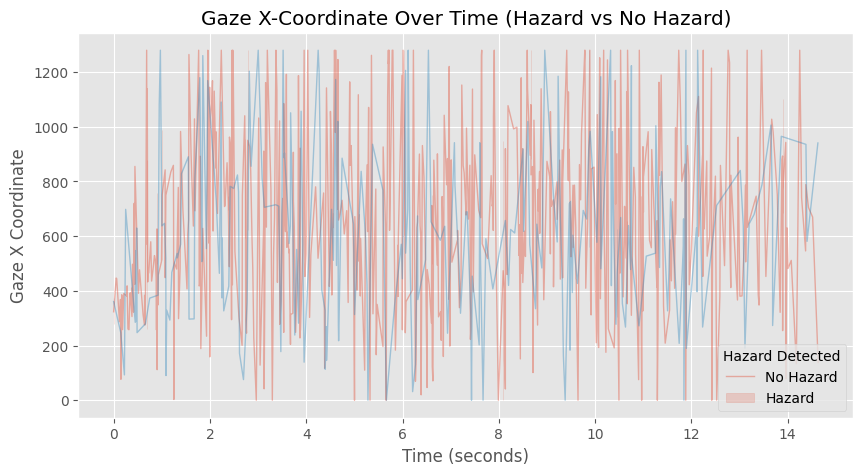

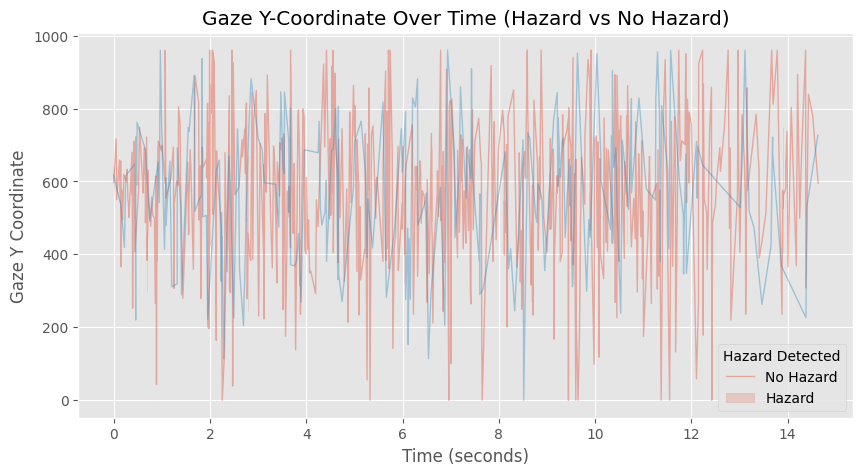

/var/folders/3c/8_0h77qx1897wgc5676zl8yh0000gn/T/ipykernel_22383/594100916.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaze_data_sampled["gaze_variance"] = gaze_data_sampled.groupby("userId")["x"].transform(lambda x: x.rolling(window=10).std())
/var/folders/3c/8_0h77qx1897wgc5676zl8yh0000gn/T/ipykernel_22383/594100916.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gaze_data_sampled, x="hazardDetected", y="gaze_variance", palette="coolwarm")


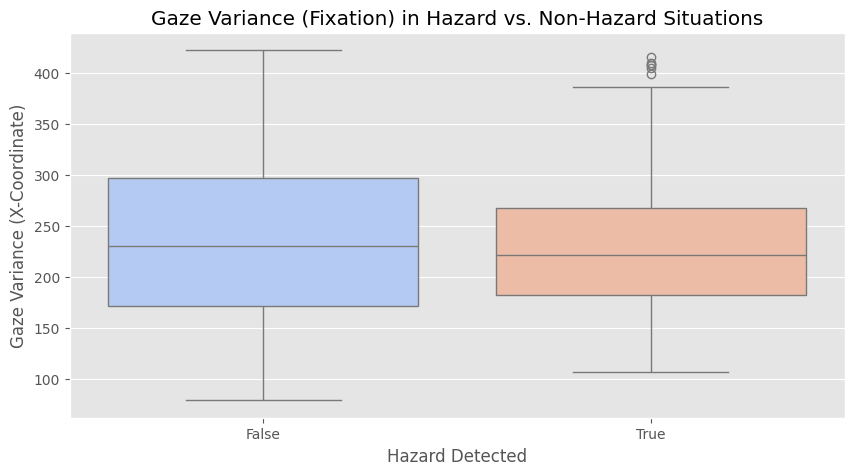

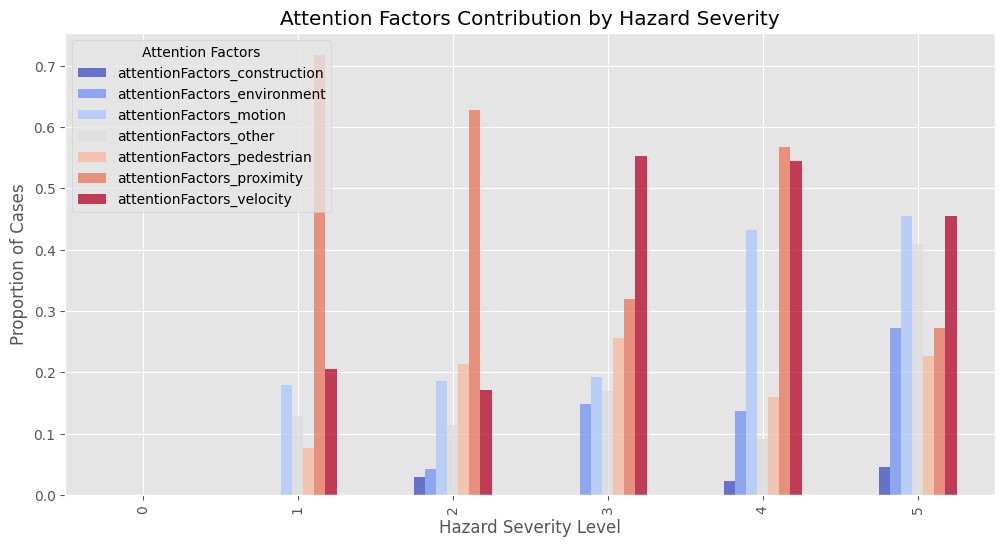

In [17]:
#Smaller sample to see if it actually reveals anything instead of being noisy
gaze_data_sampled = gaze_data_cleaned.iloc[::50, :]

# 1. **Optimized Gaze Fixation Over Time (Hazard vs. No Hazard)**
plt.figure(figsize=(10, 5))
sns.lineplot(data=gaze_data_sampled, x="time", y="x", hue="hazardDetected", alpha=0.4, linewidth=1)
plt.title("Gaze X-Coordinate Over Time (Hazard vs No Hazard)")
plt.xlabel("Time (seconds)")
plt.ylabel("Gaze X Coordinate")
plt.legend(title="Hazard Detected", labels=["No Hazard", "Hazard"])
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=gaze_data_sampled, x="time", y="y", hue="hazardDetected", alpha=0.4, linewidth=1)
plt.title("Gaze Y-Coordinate Over Time (Hazard vs No Hazard)")
plt.xlabel("Time (seconds)")
plt.ylabel("Gaze Y Coordinate")
plt.legend(title="Hazard Detected", labels=["No Hazard", "Hazard"])
plt.show()

# 2. **Optimized Gaze Fixation Variance (Higher variance may indicate distracted driving)**
gaze_data_sampled["gaze_variance"] = gaze_data_sampled.groupby("userId")["x"].transform(lambda x: x.rolling(window=10).std())

plt.figure(figsize=(10, 5))
sns.boxplot(data=gaze_data_sampled, x="hazardDetected", y="gaze_variance", palette="coolwarm")
plt.title("Gaze Variance (Fixation) in Hazard vs. Non-Hazard Situations")
plt.xlabel("Hazard Detected")
plt.ylabel("Gaze Variance (X-Coordinate)")
plt.show()

# 3. **Attention Factors and Hazard Severity**
hazard_attention_sampled = gaze_data_sampled.groupby("hazardSeverity")[attention_factors].mean()

hazard_attention_sampled.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", alpha=0.75)
plt.title("Attention Factors Contribution by Hazard Severity")
plt.xlabel("Hazard Severity Level")
plt.ylabel("Proportion of Cases")
plt.legend(title="Attention Factors")
plt.show()
